Import Labraries

In [ ]:
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loading Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Murid Projects /Thyroid Disease Detection/Dataset/thyroidDF.csv')
df.head(5)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Murid Projects /Thyroid Disease Detection/Dataset/thyroidDF.csv'

In [ ]:
df = pd.read_csv('/content/thyroid.csv')
df.head(5)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  8865 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

In [ ]:
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'target', 'patient_id'],
      dtype='object')

Checking Null Values

In [ ]:
df.isnull().sum()

age                       0
sex                     307
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     842
T3_measured               0
T3                     2604
TT4_measured              0
TT4                     442
T4U_measured              0
T4U                     809
FTI_measured              0
FTI                     802
TBG_measured              0
TBG                    8823
referral_source           0
target                    0
patient_id                0
dtype: int64

**Correlation Matrix**

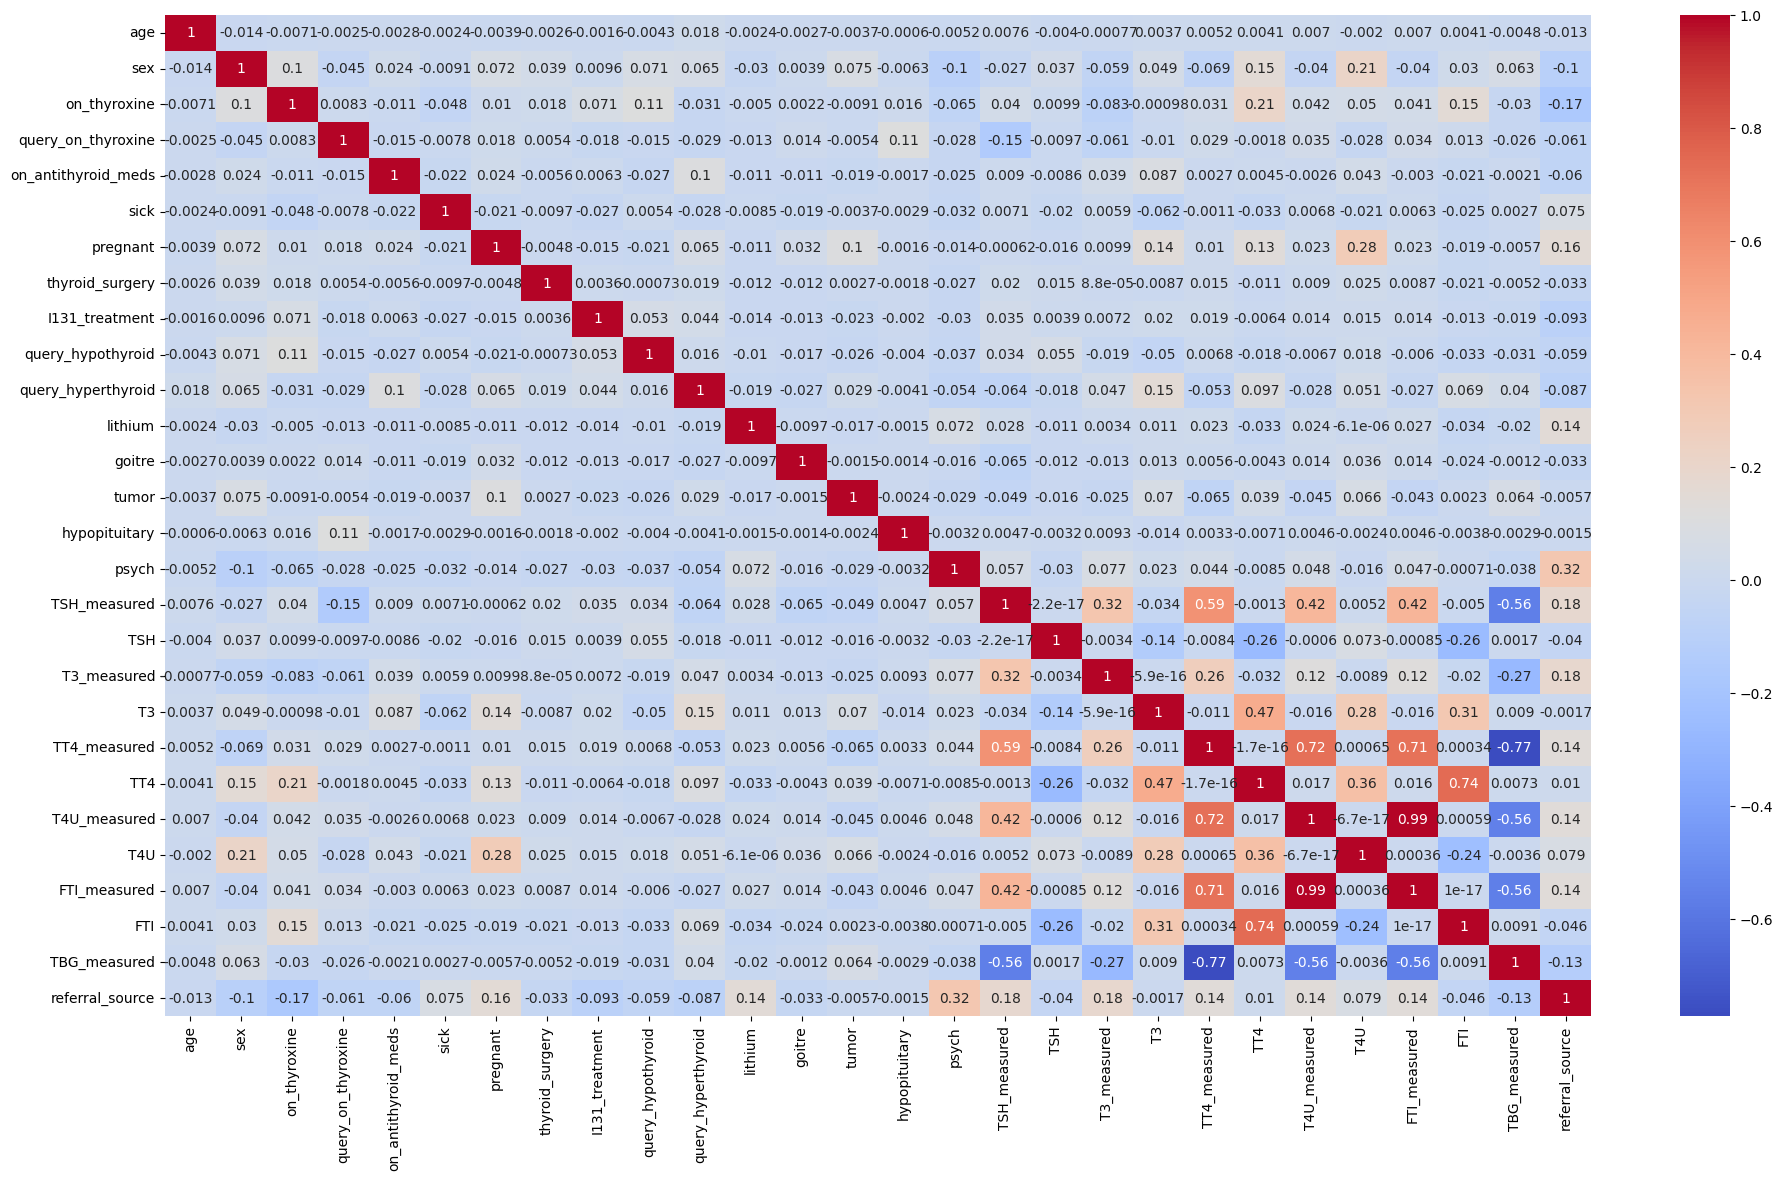

In [ ]:
import pandas as pd
import seaborn as sns


df_numeric = df.apply(pd.to_numeric, errors='coerce')


numeric_columns = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(23, 13))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Delete unnecessary column

In [ ]:
df = df.drop(['TBG', 'patient_id'], axis=1)


In [ ]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source,target
0,29,F,f,f,f,f,f,f,f,t,...,1.970629,f,108.700305,f,0.976056,f,113.640746,f,other,-
1,29,F,f,f,f,f,f,f,f,f,...,1.900000,t,128.000000,f,0.976056,f,113.640746,f,other,-
2,41,F,f,f,f,f,f,f,f,f,...,1.970629,f,108.700305,f,0.976056,f,113.640746,t,other,-
3,36,F,f,f,f,f,f,f,f,f,...,1.970629,f,108.700305,f,0.976056,f,113.640746,t,other,-
4,32,F,f,f,f,f,f,f,f,f,...,1.970629,f,108.700305,f,0.976056,f,113.640746,t,other,S


Filling Null values

In [ ]:
df['TSH'].fillna(df['TSH'].mean(), inplace=True)
df['T3'].fillna(df['T3'].mean(), inplace=True)
df['TT4'].fillna(df['TT4'].mean(), inplace=True)
df['T4U'].fillna(df['T4U'].mean(), inplace=True)
df['FTI'].fillna(df['FTI'].mean(), inplace=True)

In [ ]:
df['sex'].fillna('F', inplace=True)

Check Again

In [ ]:
df.isnull().sum()

age                    0
sex                    0
on_thyroxine           0
query_on_thyroxine     0
on_antithyroid_meds    0
sick                   0
pregnant               0
thyroid_surgery        0
I131_treatment         0
query_hypothyroid      0
query_hyperthyroid     0
lithium                0
goitre                 0
tumor                  0
hypopituitary          0
psych                  0
TSH_measured           0
TSH                    0
T3_measured            0
T3                     0
TT4_measured           0
TT4                    0
T4U_measured           0
T4U                    0
FTI_measured           0
FTI                    0
TBG_measured           0
referral_source        0
target                 0
dtype: int64

**Histogram for Numerical Features**

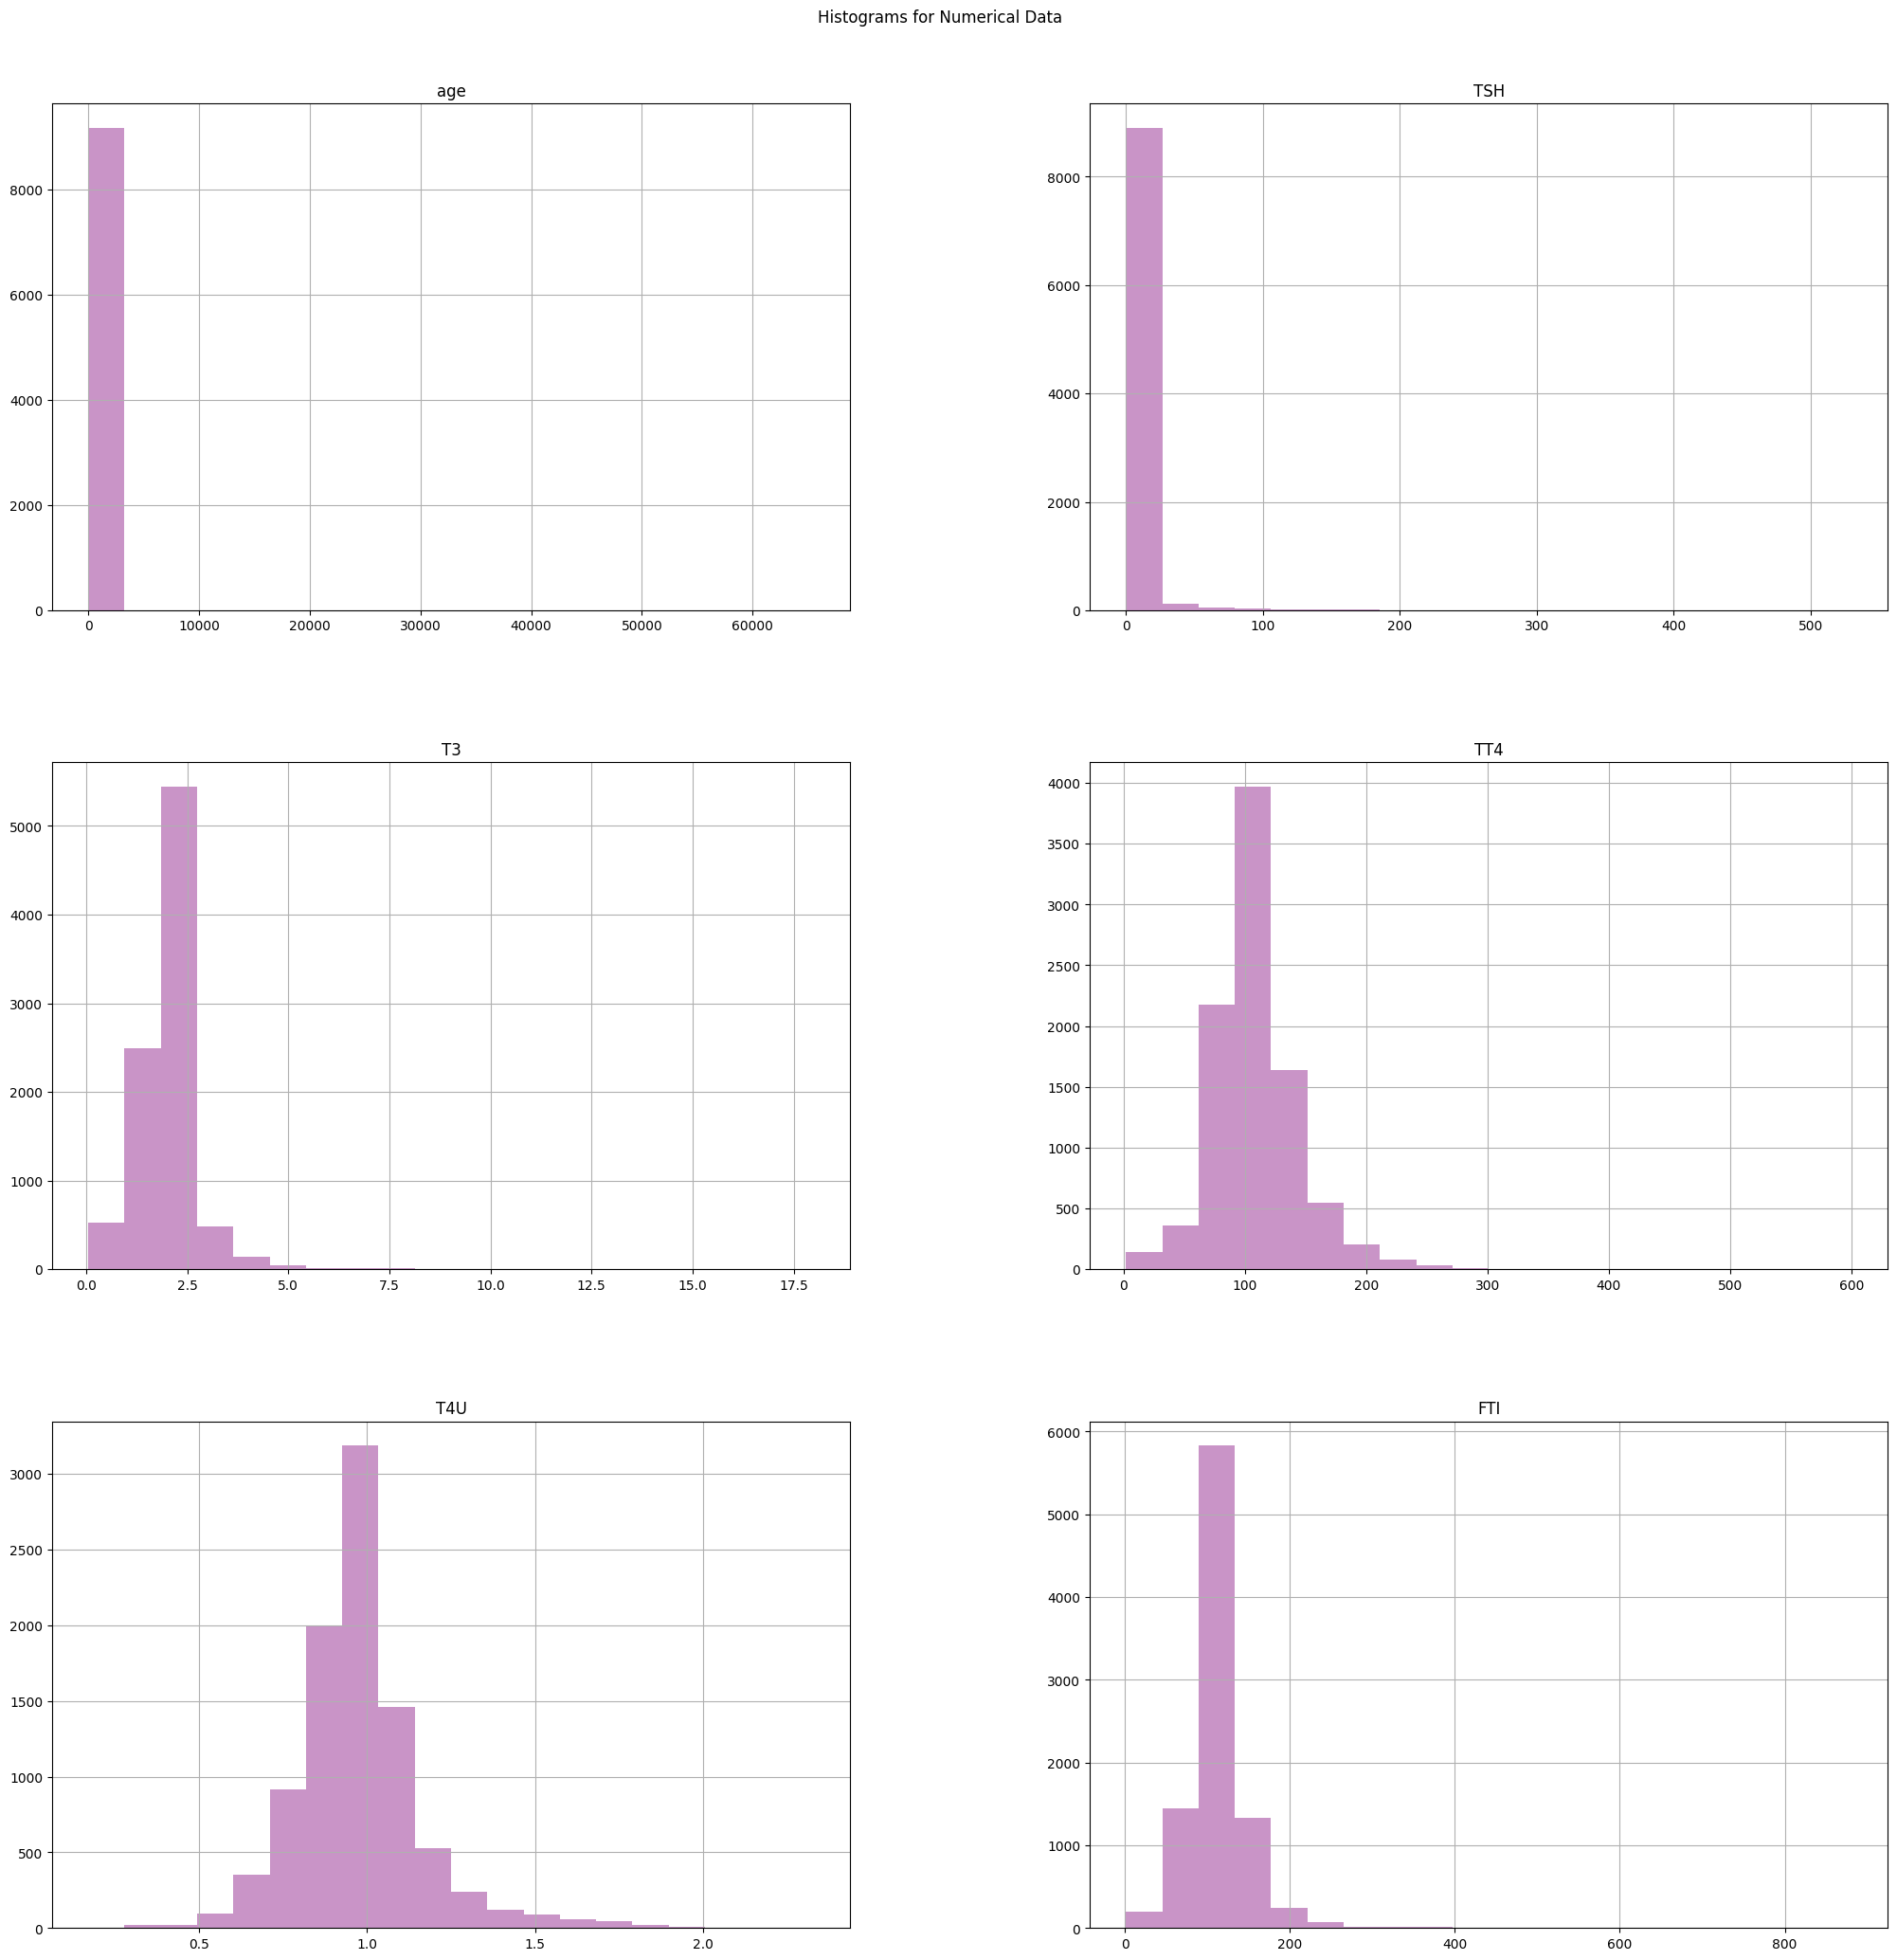

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical and categorical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Plot histograms for numerical data
df[numerical_columns].hist(figsize=(25, 25), bins=20, color='#c994c7')
plt.suptitle('Histograms for Numerical Data', y=0.92)
plt.show()



**Bar chart for categorical features**

<ipython-input-13-b2e0546165e7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=ax, palette="rocket")
<ipython-input-13-b2e0546165e7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=ax, palette="rocket")
<ipython-input-13-b2e0546165e7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=ax, palette="rocket")
<ipython-input-13-b2e0546165e7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` an

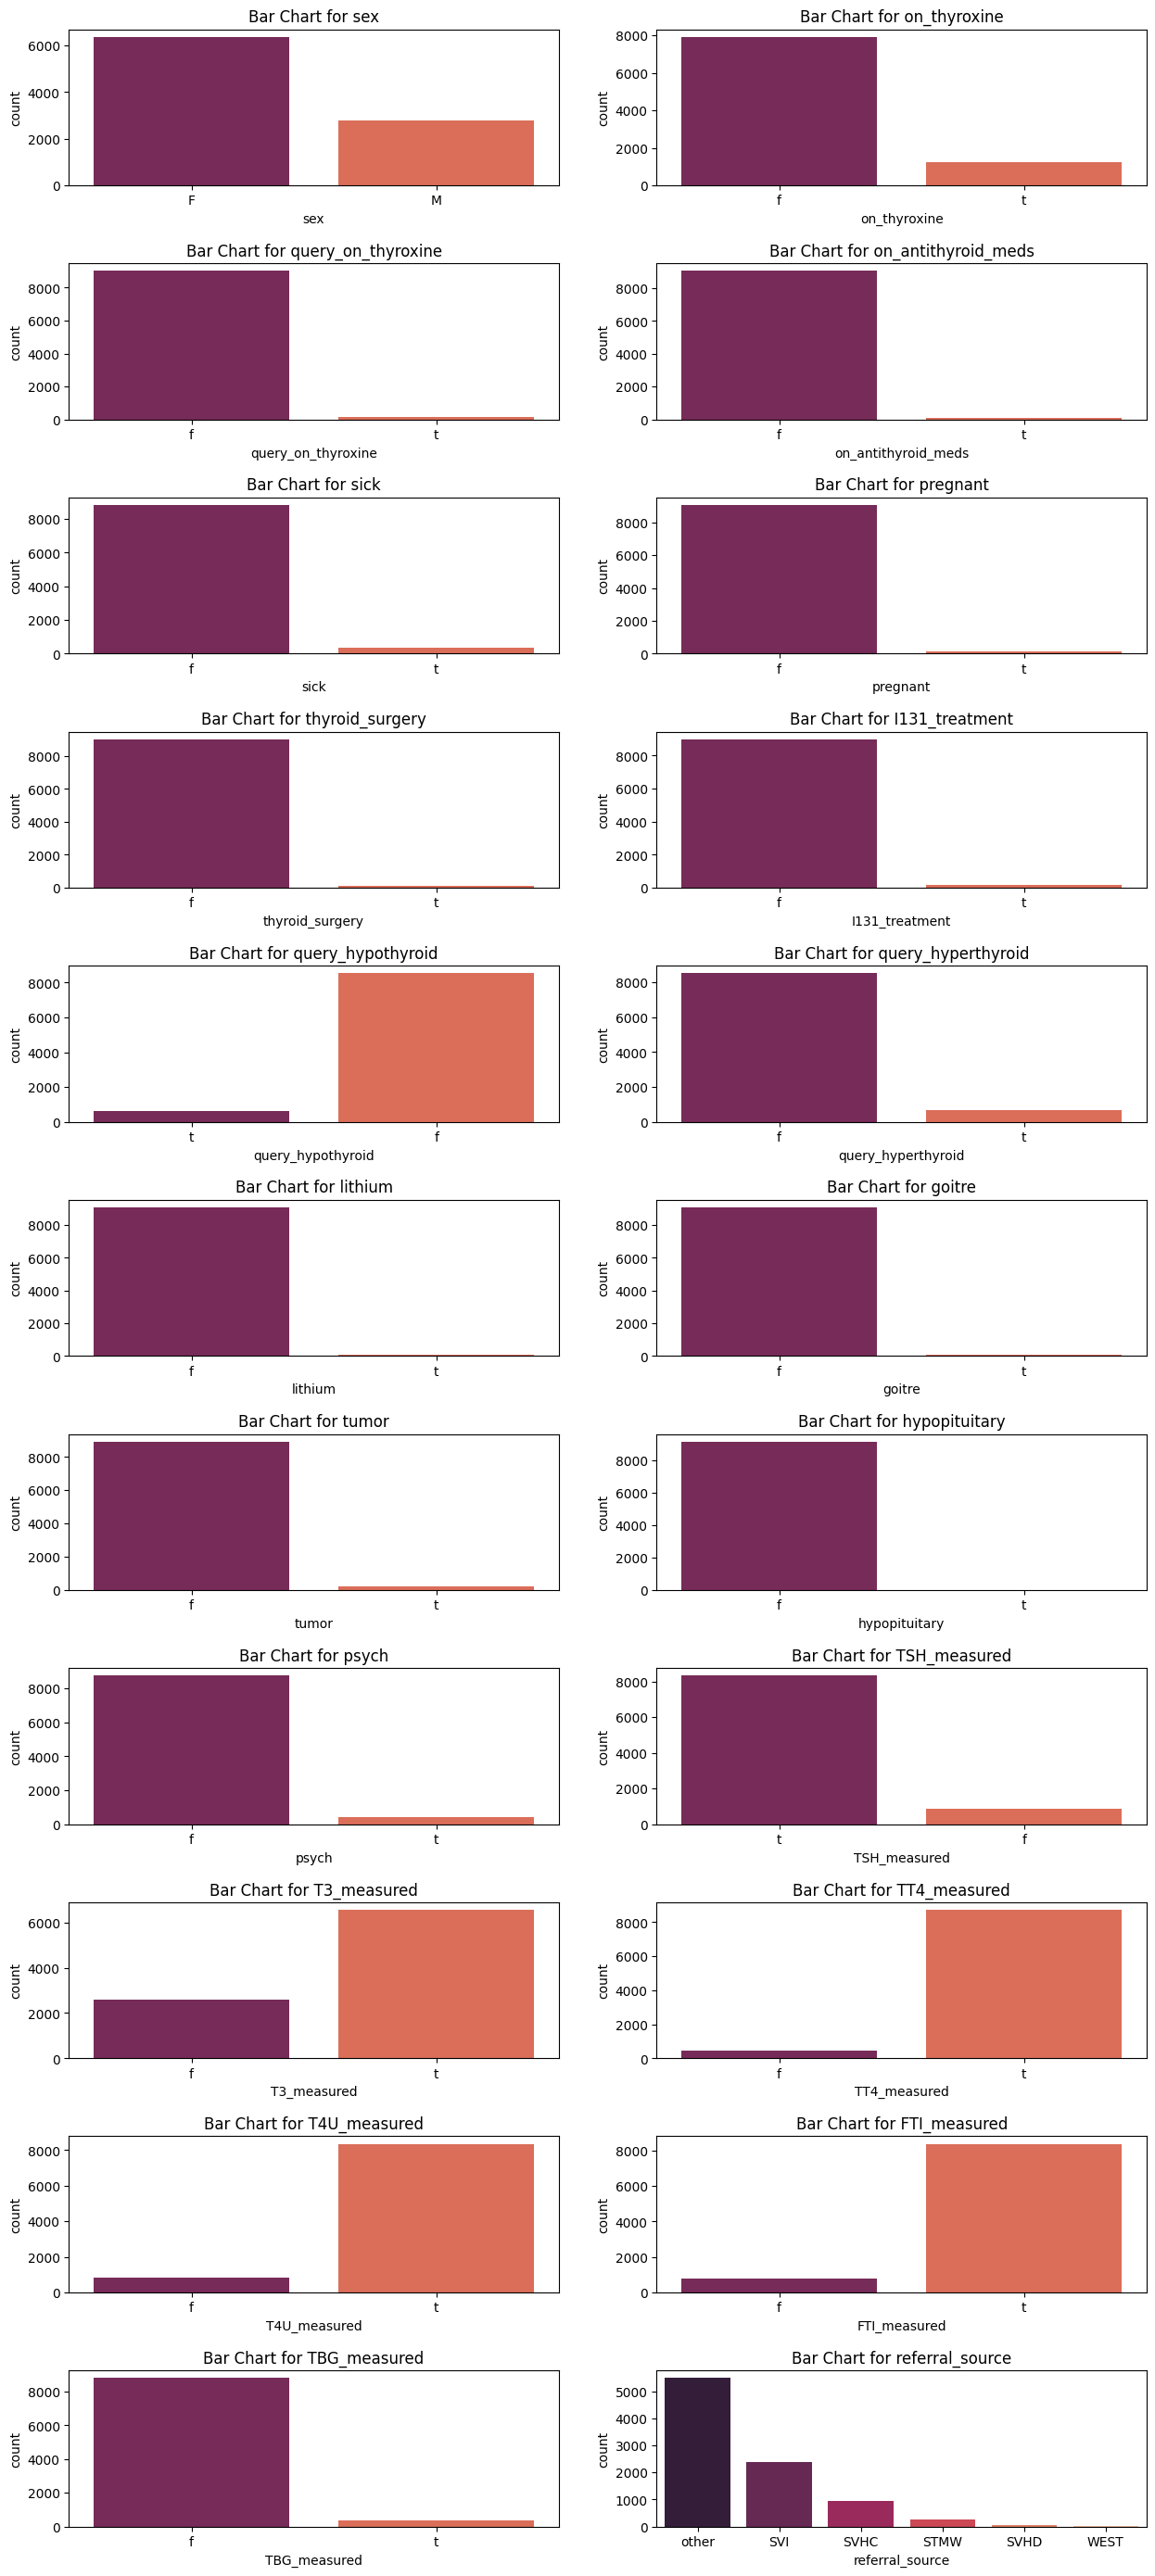

In [ ]:
# Plot bar charts for categorical data
fig, axes = plt.subplots(nrows=len(categorical_columns)//2, ncols=2, figsize=(15, 35))
fig.subplots_adjust(hspace=0.5)

for col, ax in zip(categorical_columns, axes.flatten()):
    sns.countplot(x=col, data=df, ax=ax, palette="rocket")
    ax.set_title(f'Bar Chart for {col}')

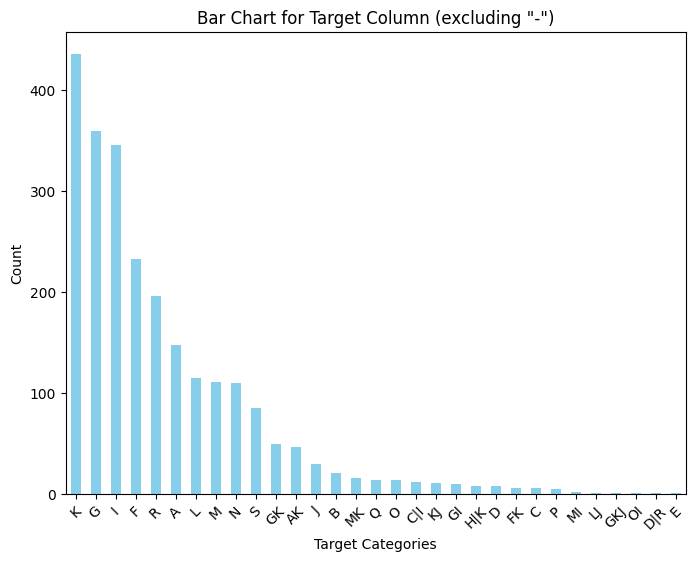

In [ ]:
import matplotlib.pyplot as plt

# Remove rows with '-' in the 'target' column from the original DataFrame
df = df[df['target'] != '-']

# Plot the bar chart for the modified 'target' column
plt.figure(figsize=(8, 6))
df['target'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Bar Chart for Target Column (excluding "-")')
plt.xlabel('Target Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()



Machine Learning doesn't know anything except 0 and 1

In [ ]:
# replacing boolean strings with binary 0 and 1
df.replace('f', 0, inplace=True)
df.replace('t', 1, inplace=True)

# replacing Male-Female with binary 0 and 1
df.replace('M', 0, inplace=True) # male mapped to 0
df.replace('F', 1, inplace=True) # female mapped to 1

In [ ]:
rs_encoder = { 'other' : 0, 'SVI' : 1, 'SVHC' : 2, 'STMW' : 3, 'SVHD' : 4, 'WEST' : 5}
df['referral_source'] = df['referral_source'].map(rs_encoder)
df['referral_source']

0       0
1       0
2       0
3       0
4       0
       ..
9167    1
9168    1
9169    1
9170    0
9171    0
Name: referral_source, Length: 9172, dtype: int64

In [ ]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source,target
4,32,1,0,0,0,0,0,0,0,0,...,1.970629,0,108.700305,0,0.976056,0,113.640746,1,0,S
18,63,1,1,0,0,1,0,0,0,0,...,1.970629,1,48.000000,1,1.020000,1,47.000000,0,0,1
28,75,1,0,0,0,0,0,0,0,0,...,1.600000,1,157.000000,1,0.890000,1,176.000000,0,1,AK
32,41,0,0,0,0,0,0,0,0,0,...,1.600000,1,39.000000,1,1.000000,1,39.000000,0,0,R
33,71,1,1,0,0,0,0,0,0,0,...,1.970629,1,126.000000,1,1.380000,1,91.000000,0,0,I


All features are converted into numerical format.

Now apply **Normalization Technique** to convert them between 0 and 1.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

numerical_columns = df.select_dtypes(include=['float64','int64']).columns

scaler = MinMaxScaler()

df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

df.head()


,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source,target
0,0.000427,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.106999,0.0,0.178429,0.0,0.373174,0.0,0.127604,0.0,0.0,-
1,0.000427,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.103064,1.0,0.210702,0.0,0.373174,0.0,0.127604,0.0,0.0,-
2,0.000610,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.106999,0.0,0.178429,0.0,0.373174,0.0,0.127604,1.0,0.0,-
3,0.000534,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.106999,0.0,0.178429,0.0,0.373174,0.0,0.127604,1.0,0.0,-
4,0.000473,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.106999,0.0,0.178429,0.0,0.373174,0.0,0.127604,1.0,0.0,S


In [ ]:
pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 3.0 MB/s eta 0:00:00


In [ ]:
pip install lightgbm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 11.6 MB/s eta 0:00:00


**Apply 7 Machine Learning Models**

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import lightgbm as lgb

# Function to evaluate models
def evaluate_model(model_name, y_true, y_pred):
    print(f"-------- {model_name} --------")
    print(f"Accuracy: {accuracy_score(y_true, y_pred)}")
    print("Classification Report:\n", classification_report(y_true, y_pred))

# Function to evaluate models with confusion matrix
def evaluate_model_with_confusion_matrix(model_name, y_true, y_pred):
    print(f"-------- {model_name} --------")
    print(f"Accuracy: {accuracy_score(y_true, y_pred)}")
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

# Load your data (assuming df is defined)

# Prepare data
X = df.drop('target', axis=1)
y = df['target'].astype(str)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Create Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_model.predict(X_test)

# Generate and print the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report for Decision Tree Model:\n", class_report)


Classification Report for Decision Tree Model:
               precision    recall  f1-score   support

           -       0.96      0.97      0.96      1328
           0       1.00      1.00      1.00        25
           1       0.97      0.93      0.95        40
           A       0.73      0.76      0.74        21
          AK       0.71      0.50      0.59        10
           B       0.25      0.25      0.25         4
           C       0.00      0.00      0.00         0
         C|I       0.00      0.00      0.00         0
          FK       1.00      1.00      1.00         1
           G       1.00      0.99      0.99        69
          GI       0.00      0.00      0.00         1
          GK       0.86      1.00      0.92         6
           I       0.79      0.83      0.81        82
           J       1.00      1.00      1.00        12
           K       0.97      1.00      0.99       106
          KJ       1.00      1.00      1.00         2
           L       0.58      0.50

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Generate and print the classification report
class_report_rf = classification_report(y_test, y_pred_rf)
print("Classification Report for Random Forest Model:\n", class_report_rf)


Classification Report for Random Forest Model:
               precision    recall  f1-score   support

           -       0.95      0.97      0.96      1328
           0       1.00      1.00      1.00        25
           1       0.90      0.95      0.93        40
           A       0.62      0.76      0.68        21
          AK       0.78      0.70      0.74        10
           B       0.00      0.00      0.00         4
          FK       0.00      0.00      0.00         1
           G       0.95      1.00      0.97        69
          GI       0.00      0.00      0.00         1
          GK       0.86      1.00      0.92         6
           I       0.83      0.70      0.75        82
           J       1.00      0.42      0.59        12
           K       0.94      0.99      0.96       106
          KJ       1.00      0.50      0.67         2
           L       0.79      0.54      0.64        28
          MK       1.00      1.00      1.00         6
           N       0.72      0.90

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Create Support Vector Classifier model
svc_model = SVC(random_state=42)

# Fit the model on the training data
svc_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svc = svc_model.predict(X_test)

# Generate and print the classification report
class_report_svc = classification_report(y_test, y_pred_svc)
print("Classification Report for Support Vector Classifier (SVC) Model:\n", class_report_svc)


Classification Report for Support Vector Classifier (SVC) Model:
               precision    recall  f1-score   support

           -       0.74      1.00      0.85      1328
           0       0.00      0.00      0.00        25
           1       1.00      0.33      0.49        40
           A       0.75      0.14      0.24        21
          AK       0.00      0.00      0.00        10
           B       0.00      0.00      0.00         4
          FK       0.00      0.00      0.00         1
           G       0.00      0.00      0.00        69
          GI       0.00      0.00      0.00         1
          GK       0.00      0.00      0.00         6
           I       0.91      0.38      0.53        82
           J       0.00      0.00      0.00        12
           K       0.00      0.00      0.00       106
          KJ       0.00      0.00      0.00         2
           L       0.00      0.00      0.00        28
          MK       0.00      0.00      0.00         6
           N   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Create Multi-layer Perceptron model
mlp_model = MLPClassifier(random_state=42)

# Fit the model on the training data
mlp_model.fit(X_train, y_train)

# Predict on the test set
y_pred_mlp = mlp_model.predict(X_test)

# Generate and print the classification report
class_report_mlp = classification_report(y_test, y_pred_mlp)
print("Classification Report for Multi-layer Perceptron (MLP) Model:\n", class_report_mlp)


Classification Report for Multi-layer Perceptron (MLP) Model:
               precision    recall  f1-score   support

           -       0.87      0.97      0.92      1328
           0       0.81      0.68      0.74        25
           1       0.90      0.88      0.89        40
           A       0.52      0.52      0.52        21
          AK       0.50      0.50      0.50        10
           B       0.50      0.25      0.33         4
           D       0.00      0.00      0.00         0
          FK       0.00      0.00      0.00         1
           G       0.91      0.58      0.71        69
          GI       0.00      0.00      0.00         1
          GK       1.00      0.33      0.50         6
           I       0.75      0.48      0.58        82
           J       0.00      0.00      0.00        12
           K       0.79      0.58      0.67       106
          KJ       0.00      0.00      0.00         2
           L       0.61      0.39      0.48        28
          MK      

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being se

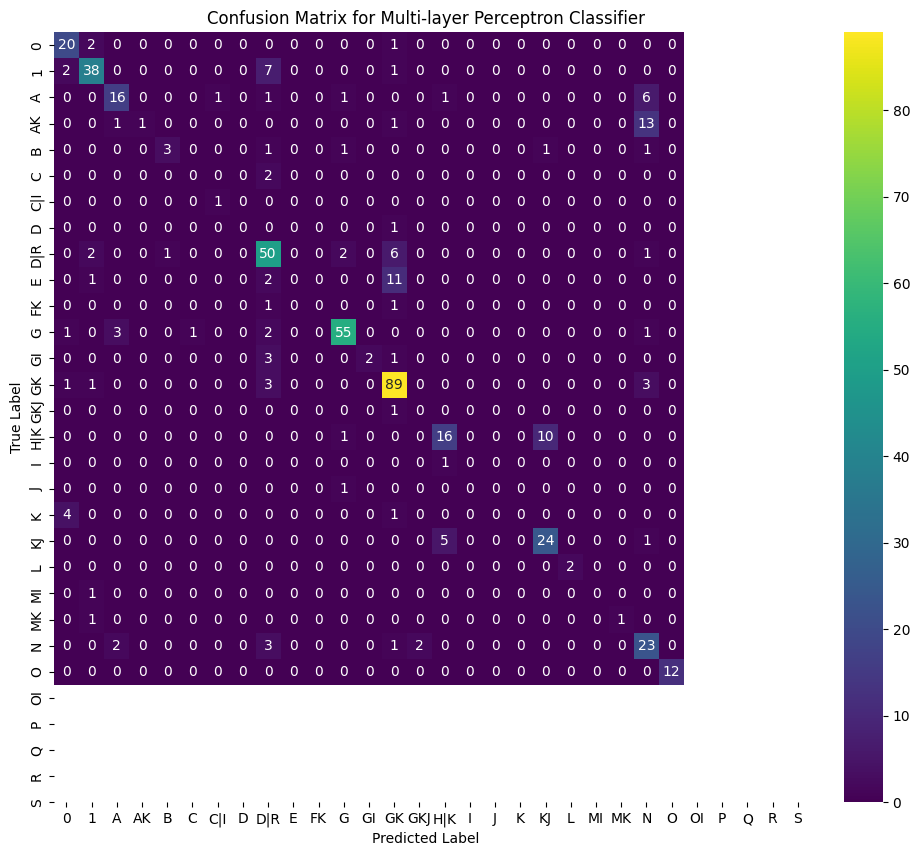

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier


# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_mlp)

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, cmap='viridis', fmt='d', xticklabels=mlp_model.classes_, yticklabels=mlp_model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Multi-layer Perceptron Classifier')
plt.show()


In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report

# Create LightGBM model
lgbm_model = LGBMClassifier(random_state=42)

# Fit the model on the training data
lgbm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lgbm = lgbm_model.predict(X_test)

# Generate and print the classification report
class_report_lgbm = classification_report(y_test, y_pred_lgbm)
print("Classification Report for LightGBM Model:\n", class_report_lgbm)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003829 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1094
[LightGBM] [Info] Number of data points in the train set: 7337, number of used features: 27
[LightGBM] [Info] Start training from score -0.298600
[LightGBM] [Info] Start training from score -4.446338
[LightGBM] [Info] Start training from score -3.637995
[LightGBM] [Info] Start training from score -4.064403
[LightGBM] [Info] Start training from score -5.317166
[LightGBM] [Info] Start training from score -6.067472
[LightGBM] [Info] Start training from score -7.108926
[LightGBM] [Info] Start training from score -6.415779
[LightGBM] [Info] Start training from score -6.821244
[LightGBM] [Info] Start training from score -8.900685
[LightGBM] [Info] Start training from score -8.900685
[LightGBM] [Info] Start training from score -7.291247


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Create Logistic Regression model
lr_model = LogisticRegression(random_state=42)

# Fit the model on the training data
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

# Generate and print the classification report
class_report_lr = classification_report(y_test, y_pred_lr)
print("Classification Report for Logistic Regression Model:\n", class_report_lr)



Classification Report for Logistic Regression Model:
               precision    recall  f1-score   support

           -       0.75      1.00      0.86      1328
           0       0.50      0.04      0.07        25
           1       0.94      0.38      0.54        40
           A       0.57      0.19      0.29        21
          AK       0.00      0.00      0.00        10
           B       0.00      0.00      0.00         4
          FK       0.00      0.00      0.00         1
           G       0.00      0.00      0.00        69
          GI       0.00      0.00      0.00         1
          GK       0.00      0.00      0.00         6
           I       0.89      0.41      0.57        82
           J       0.00      0.00      0.00        12
           K       0.00      0.00      0.00       106
          KJ       0.00      0.00      0.00         2
           L       0.00      0.00      0.00        28
          MK       0.00      0.00      0.00         6
           N       0.67    

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

**Random Forest SHAP & LIME**

In [ ]:
pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 4.1 MB/s eta 0:00:00


In [ ]:
np.unique(y_test).sum()

'-01AAKBFKGGIGKIJKKJLMKNOQRS'

In [ ]:
np.unique(y_train)

array(['-', '0', '1', 'A', 'AK', 'B', 'C', 'C|I', 'D', 'D|R', 'E', 'FK',
       'G', 'GI', 'GK', 'GKJ', 'H|K', 'I', 'J', 'K', 'KJ', 'L', 'LJ',
       'MI', 'MK', 'N', 'O', 'OI', 'P', 'Q', 'R', 'S'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

# Create a DataFrame to store the mapping
mapping_df = pd.DataFrame({'Encoded_Value': '------>', 'Original_Name': label_encoder.inverse_transform(np.unique(y_test_encoded))})

# Display the mapping table
mapping_df


,Encoded_Value,Original_Name
0,------>,0
1,------>,1
2,------>,A
3,------>,AK
4,------>,B
5,------>,C
6,------>,C|I
7,------>,FK
8,------>,G
9,------>,GK


In [ ]:
df['target'].unique()

array(['S', 1, 'AK', 'R', 'I', 0, 'N', 'G', 'K', 'A', 'KJ', 'L', 'MK',
       'Q', 'J', 'C|I', 'O', 'LJ', 'H|K', 'D', 'GK', 'MI', 'P', 'FK', 'B',
       'GI', 'C', 'GKJ', 'OI', 'D|R', 'E'], dtype=object)

In [ ]:
pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=58369f43c12d74fd75814235834a945d05ec07217574297c8d712da3c25666fc
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import lime
from lime import lime_tabular
import numpy as np

# Define the LIME explainer
explainer = lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns)

# Choose an instance from the test set to explain (replace 'index_of_instance' with the actual index)
index_of_instance = 0
instance_to_explain = X_test.iloc[index_of_instance]

# Explain the prediction for the chosen instance
exp = explainer.explain_instance(instance_to_explain.values, rf_model.predict_proba, num_features=len(X_train.columns))

# Plot the explanation
exp.show_in_notebook(show_table=True, show_all=False)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


**DL - ANN**

In [ ]:
pip install tensorflow keras


# ANN, CNN, RNN

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Conv1D, GlobalMaxPooling1D, concatenate
from keras.layers import Input, Dense, Conv1D, MaxPooling1D, LSTM, concatenate
from sklearn.metrics import classification_report

# Artificial Neural Network (ANN)
def create_ann_model(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=input_shape),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Convert DataFrame to numpy array
X_train_array = X_train.to_numpy()
X_test_array = X_test.to_numpy()

# Reshape input data to include the number of features dimension
X_train_reshaped = X_train_array.reshape(X_train_array.shape[0], X_train_array.shape[1], 1)
X_test_reshaped = X_test_array.reshape(X_test_array.shape[0], X_test_array.shape[1], 1)


# 1D CNN
def create_cnn_model(input_shape):
    model = Sequential([
        Conv1D(64, 3, activation='relu', input_shape=input_shape),
        GlobalMaxPooling1D(),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


#Hybrid Model of ANN & LSTM
def create_hybrid_model(input_shape):
    # Define input layers for ANN and LSTM branches
    ann_input = Input(shape=input_shape)
    lstm_input = Input(shape=input_shape)

    # ANN branch
    ann_output = Dense(64, activation='relu')(ann_input)
    ann_output = Dense(64, activation='relu')(ann_output)

    # LSTM branch
    lstm_output = LSTM(64, activation='relu')(lstm_input)

    # Merge the outputs of the two branches
    merged = concatenate([ann_output, lstm_output])

    # Output layer
    output = Dense(1, activation='sigmoid')(merged)

    # Define the model with inputs and output
    model = Model(inputs=[ann_input, lstm_input], outputs=output)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Convert target labels to binary (0 or 1)
y_train_binary = (y_train == '1').astype(int)
y_test_binary = (y_test == '1').astype(int)

# ANN model
ann_model = create_ann_model(X_train.shape[1:])
ann_model.fit(X_train, y_train_binary, epochs=10, batch_size=32, verbose=0)
y_pred_ann = (ann_model.predict(X_test) > 0.5).astype(int)
print("Classification Report for ANN:")
print(classification_report(y_test_binary, y_pred_ann))

# CNN model
cnn_model = create_cnn_model(input_shape=(X_train.shape[1], 1))
cnn_model.fit(X_train, y_train_binary, epochs=10, batch_size=32, verbose=0)
y_pred_cnn = (cnn_model.predict(X_test) > 0.5).astype(int)
print("\nClassification Report for 1D CNN:")
print(classification_report(y_test_binary, y_pred_cnn))

# Hybrid model
hybrid_model = create_hybrid_model(input_shape=(X_train_array.shape[1], 1))
hybrid_model.fit([X_train, X_train], y_train_binary, epochs=10, batch_size=32, verbose=0)
y_pred_hybrid = (hybrid_model.predict([X_test, X_test]) > 0.5).astype(int)
print("\nClassification Report for Hybrid Deep Learning Model:")
print(classification_report(y_test_binary, y_pred_hybrid))


16/16 [==============================] - 0s 2ms/step
Classification Report for ANN:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       433
           1       0.91      0.67      0.77        48

    accuracy                           0.96       481
   macro avg       0.94      0.83      0.87       481
weighted avg       0.96      0.96      0.96       481

16/16 [==============================] - 0s 2ms/step

Classification Report for 1D CNN:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       433
           1       0.00      0.00      0.00        48

    accuracy                           0.90       481
   macro avg       0.45      0.50      0.47       481
weighted avg       0.81      0.90      0.85       481



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ValueError: A `Concatenate` layer requires inputs with matching shapes except for the concatenation axis. Received: input_shape=[(None, 28, 64), (None, 64)]